In [1]:
'''
* Multi-Armed Bandit Problem
Say we've 5 slot machines, which one do you pick to maximise your returns.
Every machine has a distribution and we need to find out the easiest to win.

* How to predict?
So we know that all machines must have a distrubution of winning but we 
need to find out what one is highest.
At the start randomly pick a machine an pull the leaver and record if we 
won or loss.
We keep picking machine at random until we start to average out our results
and start to pick machine that we end up winning more on.
Then we have results that we end up winning more on some than others
we start to just pick that. We do sometimes go to other ones just to check
they are still worse but we keep going back to the machine we keep winning
on.


We want to find what ad was the best.
1. We display ads to users each time they hit our webpage
2. Each time a user connects that counts as a round
3. Each round n, we chosse one ad to display
4. We reward the algorithm if the user clicks the ad, and no reward if we dont
5. Maximise the reward we get.


Thimpson Sampling: 
    Probabilistic
    Can accommodate delayed feedback
    Better empirical evidence (better than UCB)

'''

"\n* Multi-Armed Bandit Problem\nSay we've 5 slot machines, which one do you pick to maximise your returns.\nEvery machine has a distribution and we need to find out the easiest to win.\n\n* How to predict?\nSo we know that all machines must have a distrubution of winning but we \nneed to find out what one is highest.\nAt the start randomly pick a machine an pull the leaver and record if we \nwon or loss.\nWe keep picking machine at random until we start to average out our results\nand start to pick machine that we end up winning more on.\nThen we have results that we end up winning more on some than others\nwe start to just pick that. We do sometimes go to other ones just to check\nthey are still worse but we keep going back to the machine we keep winning\non.\n\n\nWe want to find what ad was the best.\n1. We display ads to users each time they hit our webpage\n2. Each time a user connects that counts as a round\n3. Each round n, we chosse one ad to display\n4. We reward the algorithm

In [2]:
# Import librarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [3]:
# Import the dataset
'''
We're trying to predict in the future, so we reward the algorithm
if we get a click from the users. This dataset is just a simulation
of 10,000 users and what ads they will click.
Our algo needs to learn from correct clicks and then build on this to
know what ad to show next.

These are 10 different ads shown to 10,000 different users.
User 0 will click on add 1, 5 and 9

So the algorithm will run 10,000 times and we will reward it if it
guesses the right ad to show that user.

We run multiple rounds of this algorithm and check its rewards score
and then take the highest reward scoring algos.
'''

root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 6 - Reinforcement Learning/Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(data_file)
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [4]:
# Build the model
N = len(dataset) # Number of rounds  
d = len(dataset.columns) # Number of ads
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

ads_selected

[9,
 4,
 3,
 5,
 2,
 6,
 1,
 0,
 7,
 0,
 8,
 5,
 4,
 9,
 1,
 0,
 4,
 6,
 1,
 0,
 5,
 4,
 6,
 8,
 1,
 8,
 7,
 0,
 9,
 3,
 7,
 2,
 8,
 7,
 4,
 2,
 3,
 6,
 9,
 2,
 7,
 8,
 7,
 0,
 1,
 6,
 7,
 7,
 7,
 5,
 9,
 7,
 8,
 5,
 0,
 9,
 8,
 3,
 4,
 4,
 9,
 7,
 7,
 6,
 2,
 3,
 8,
 5,
 4,
 2,
 7,
 3,
 5,
 3,
 8,
 4,
 0,
 3,
 3,
 7,
 4,
 2,
 3,
 3,
 5,
 5,
 5,
 7,
 1,
 2,
 9,
 0,
 3,
 5,
 7,
 7,
 6,
 3,
 7,
 0,
 9,
 0,
 7,
 0,
 8,
 4,
 3,
 1,
 7,
 3,
 8,
 7,
 3,
 7,
 8,
 3,
 6,
 7,
 1,
 1,
 1,
 2,
 0,
 3,
 8,
 7,
 1,
 1,
 9,
 1,
 5,
 1,
 7,
 8,
 2,
 3,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 7,
 1,
 4,
 1,
 1,
 7,
 6,
 4,
 3,
 7,
 8,
 7,
 0,
 1,
 7,
 7,
 1,
 1,
 7,
 4,
 7,
 3,
 3,
 6,
 7,
 7,
 1,
 1,
 7,
 7,
 3,
 7,
 8,
 3,
 7,
 9,
 7,
 7,
 6,
 4,
 7,
 7,
 1,
 1,
 7,
 3,
 7,
 1,
 0,
 3,
 1,
 1,
 3,
 7,
 3,
 0,
 7,
 1,
 7,
 7,
 5,
 7,
 3,
 3,
 0,
 1,
 3,
 3,
 6,
 0,
 9,
 4,
 7,
 7,
 3,
 7,
 3,
 1,
 7,
 7,
 7,
 3,
 7,
 7,
 7,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 1,
 7,
 7,
 7,
 7,
 3,
 3,
 3,
 0,


Text(0, 0.5, 'Number of times each ad was selected')

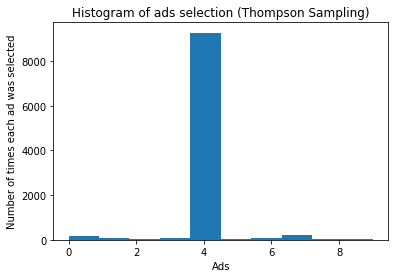

In [5]:
# Visualise the results
plt.hist(ads_selected)
plt.title('Histogram of ads selection (Thompson Sampling)')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')